First import plotting modules

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Then import a dataset

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 1. Linear regression

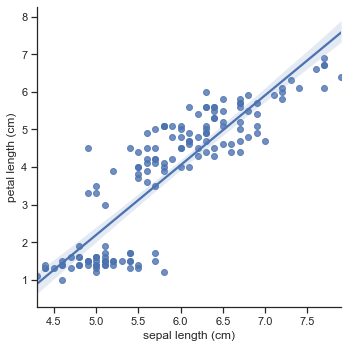

In [16]:
# Plot a linear regression between 'sepal length (cm)' and 'petal length (cm)' from dataframe 'data'
sns.lmplot(x='sepal length (cm)', y='petal length (cm)', data=data)
plt.show()

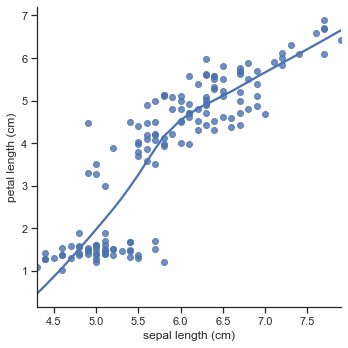

In [20]:
# Plot a logistic regression
sns.lmplot(x='sepal length (cm)', y='petal length (cm)', data=data, lowess=True, y_jitter=.03)
plt.show()

### Residual plot

The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

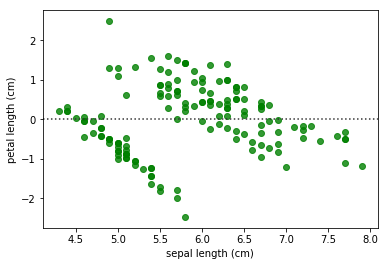

In [6]:
# Generate a green residual plot of the regression between ''sepal length (cm)' and 'petal length (cm)'
sns.residplot(x='sepal length (cm)', y='petal length (cm)', data=data, color='green')
plt.show()

# 2. Regplot

A principal difference between sns.lmplot() and sns.regplot() is the way in
which matplotlib options are passed (sns.regplot() is more permissive).

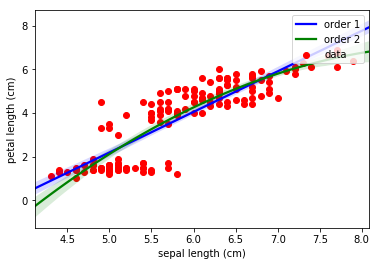

In [7]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(data['sepal length (cm)'], data['petal length (cm)'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'sepal length' and 'petal length'
sns.regplot(x='sepal length (cm)', y='petal length (cm)', data=data, scatter=None, color='blue', label='order 1')

# Plot in green a linear regression of order 2 between 'sepal length' and 'petal length'
sns.regplot(x='sepal length (cm)', y='petal length (cm)', data=data, scatter=None, order=2, color='green', label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

# 3. Grouping

Using the hue argument, you can specify a categorical variable by which to group data observations.
The distinct groups of points are used to produce distinct regressions with different hues in the plot.

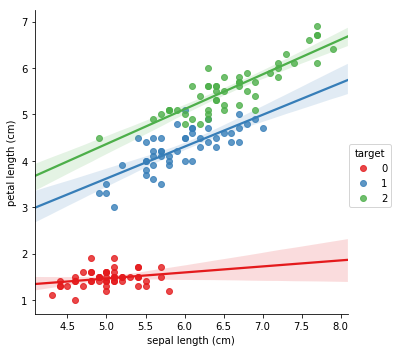

In [8]:
# Plot a linear regression between 'sepal length' and 'petal length', with a hue of 'target' and palette of 'Set1'
sns.lmplot(x='sepal length (cm)', y='petal length (cm)', data=data, hue='target',palette='Set1')
plt.show()

The same plot but divided into rows per group.

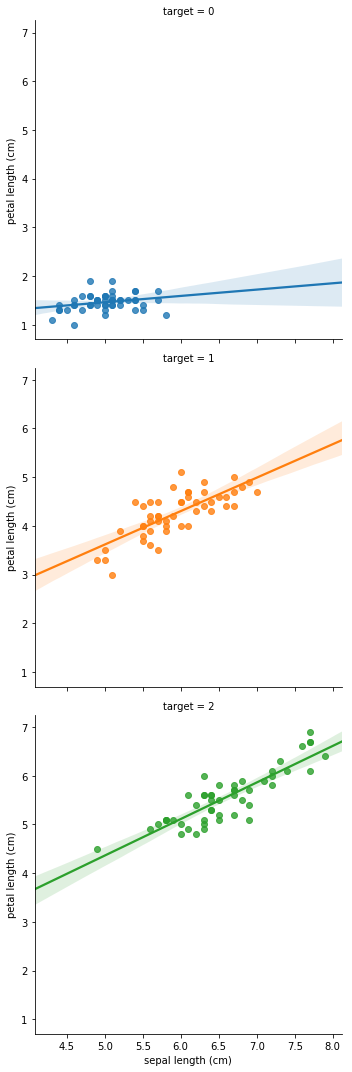

In [9]:
## Plot linear regressions between 'sepal length' and 'petal length' grouped row-wise by 'target'
sns.lmplot(x='sepal length (cm)', y='petal length (cm)', data=data, hue='target',row='target')
plt.show()

# 4. Strip plot

showing distribution of certain group

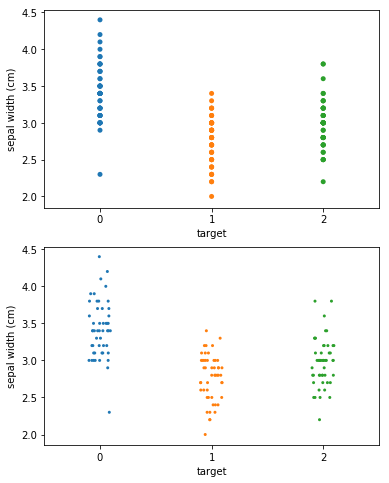

In [10]:
f, axes = plt.subplots(2, 1, figsize=(6,8))

# Make a strip plot of 'sepal width' grouped by 'target'
sns.stripplot(x='target', y='sepal width (cm)', data=data, ax=axes[0])

# Make the strip plot again using jitter and a smaller point size
sns.stripplot(x='target', y='sepal width (cm)', data=data, jitter=True, size=3, ax=axes[1])

plt.show()

# 5. Swarm plot

similar to strip, but spreads the same points to see the distribution

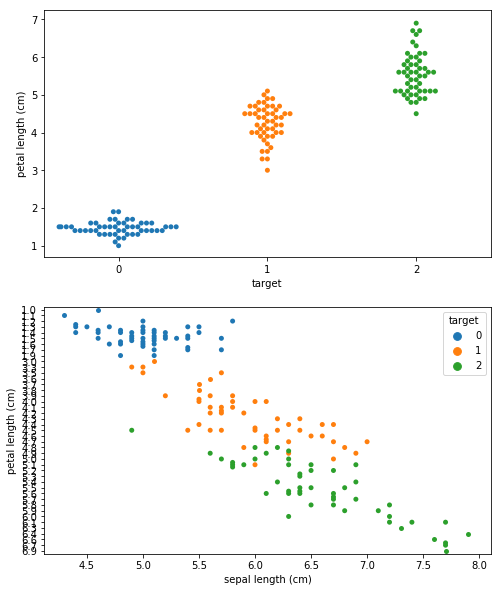

In [11]:
f, axes = plt.subplots(2, 1, figsize=(8,10))

# Generate a swarm plot of 'sepal length (cm)' grouped horizontally by 'target'
sns.swarmplot(x='target',y='petal length (cm)',data=data, ax=axes[0])

# Generate a swarm plot of 'sepal length (cm)' grouped vertically by 'petal length (cm)' with a hue of 'target'
sns.swarmplot(x='sepal length (cm)',y='petal length (cm)',data=data,hue='target',orient='h', ax=axes[1])

plt.show()

# 6. Catplot

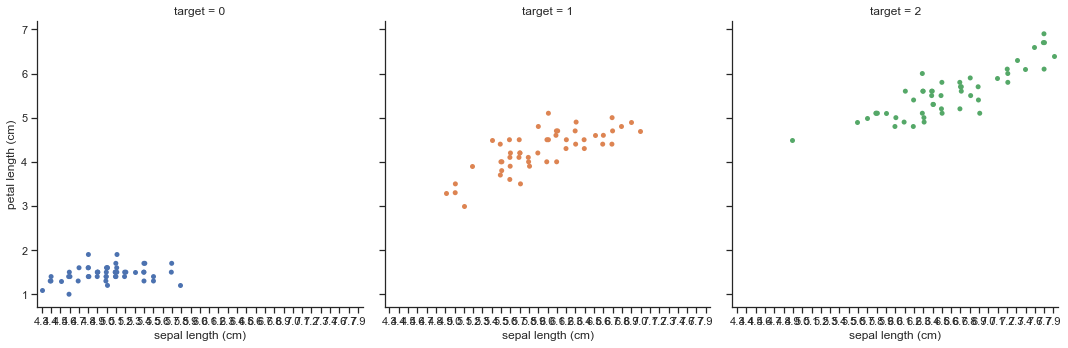

In [9]:
sns.set(style="ticks")
sns.catplot(x="sepal length (cm)", y="petal length (cm)", col="target", hue="target", data=data)
plt.show()

# 7. Violin plot

similar to box plot, with std, avg, otliers and distribution

/Users/ivanivani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/ivanivani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


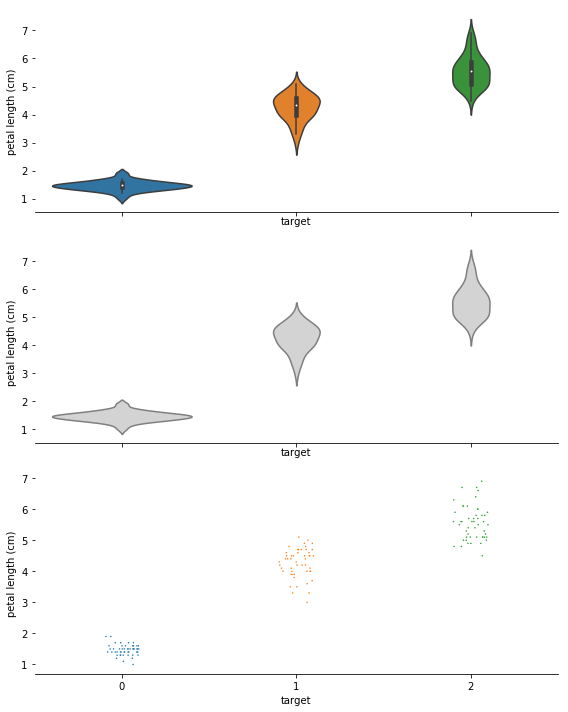

In [12]:
# Set up the matplotlib figure, sharex means they share X axis
f, axes = plt.subplots(3, 1, figsize=(8,10), sharex=True)
# remove y axis line
sns.despine(left=True)

# Generate a violin plot of 'petal length (cm)' grouped horizontally by 'target'
sns.violinplot(x='target',y='petal length (cm)',data=data, ax=axes[0])

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
sns.violinplot(x='target',y='petal length (cm)',data=data,inner=None,color='lightgray', ax=axes[ 1])

# Overlay a strip plot on the violin plot
sns.stripplot(x='target',y='petal length (cm)',data=data, size=1.5, jitter=True, ax=axes[2])

plt.tight_layout()
plt.show()

# 8. Joint plot

scatter plot with hist distributions of x and y with corrcoef and p-value

##### kde=True smooths the distributions and shows the area of scatter
##### kind='scatter' uses a scatter plot of the data points
##### kind='reg' uses a regression plot (default order 1)
##### kind='resid' uses a residual plot
##### kind='kde' uses a kernel density estimate of the joint distribution
##### kind='hex' uses a hexbin plot of the joint distribution

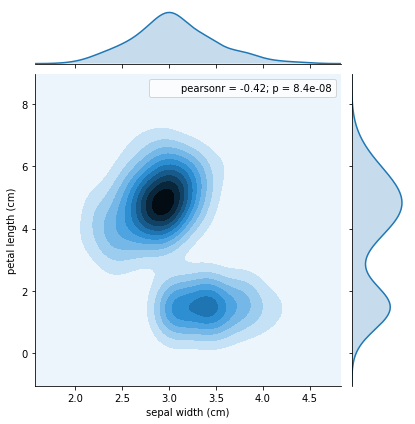

In [13]:
# Generate a joint plot of 'sepal width (cm)' and 'petal length (cm)' using a hexbin plot
sns.jointplot(x='sepal width (cm)',y='petal length (cm)',data=data,kind='kde')

plt.show()

# 9. Pair plot

makes matrix of plots with distribution on the diagonal and scattering of other correlations

##### you can group points by a columns using key hue=
##### You will display regressions as well as scatter plots in the off-diagonal subplots.
##### You will do this with the argument kind='reg' (where 'reg' means 'regression').
##### Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.
##### You will also visualize the joint distributions separated by continent of origin.
##### You will do this with the keyword argument hue specifying the 'origin'

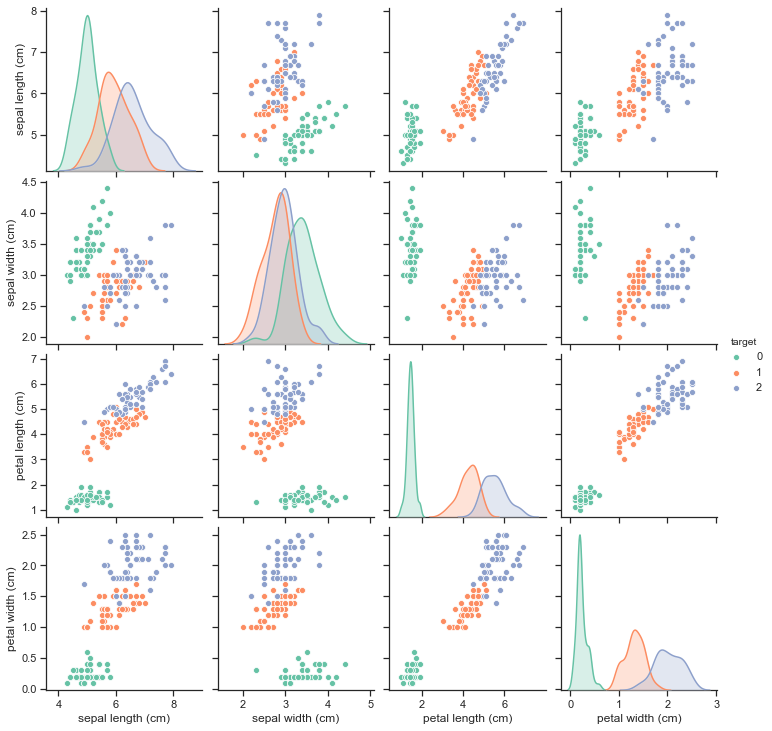

In [11]:
# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(data,hue='target', height=2.5, palette="Set2", diag_kind="kde")

plt.show()

# 10. Heatmap

shows heatmap of the covariance per columns

needs covariance matrix as the input

In [15]:
import numpy as np
cov_matrix = np.cov(data)

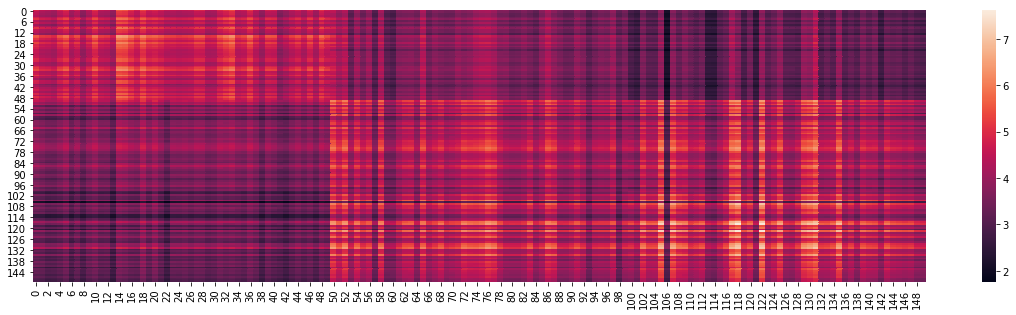

In [16]:
# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(20,5))

sns.heatmap(cov_matrix)

plt.show()